Data Analytics III
1. Implement Simple Naïve Bayes classification algorithm using Python/R on iris.csv
dataset.
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision,
Recall on the given dataset.

In [15]:
import pandas as pd


In [16]:
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [17]:
df = df.drop('Id',axis = 1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [18]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['Species'] = label.fit_transform(df['Species'])
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [19]:
from sklearn.model_selection import train_test_split
X=df.drop('Species',axis = 1)
y = df['Species']
x_test,x_train,y_test,y_train = train_test_split(X,y,random_state=0)


In [20]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)
predictions =model.predict(x_test)
model.score(x_test,y_test)


0.9553571428571429

In [21]:
from sklearn.metrics import confusion_matrix, classification_report
mat = confusion_matrix(y_test,predictions)
Mat = pd.DataFrame(mat)
Mat

,0,1,2
0,37,0,0
1,0,32,2
2,0,3,38


In [22]:
cr = classification_report(y_test,predictions,output_dict = True)
cr = pd.DataFrame(cr)
cr

,0,1,2,accuracy,macro avg,weighted avg
precision,1.0,0.914286,0.950000,0.955357,0.954762,0.955676
recall,1.0,0.941176,0.926829,0.955357,0.956002,0.955357
f1-score,1.0,0.927536,0.938272,0.955357,0.955269,0.955405
support,37.0,34.000000,41.000000,0.955357,112.000000,112.000000


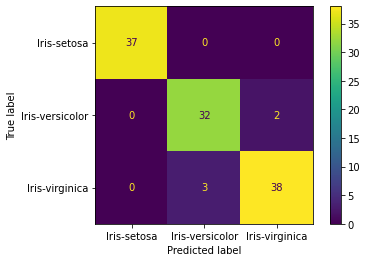

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay
class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
cmd = ConfusionMatrixDisplay(mat, display_labels=class_names)
cmd.plot()